In [2]:
import matplotlib.pyplot as plt
import numpy as np

## Experimental Data

#### Neddle (3 part)

In [3]:
d = 21*0.05*10**(-3)
dd = 0.005*10**(-3)
sigma_alc = 22.78*10**(-3)
k = 9.87*0.2
g = 9.81
rho = 997
d

0.0010500000000000002

In [4]:
DP_alc = np.array([40, 39, 40])
DP_alc = np.array([9.81*0.2*P for P in DP_alc])
print(DP_alc)
DP_alc_std = np.std(DP_alc)
DP_alc_full = (DP_alc_std**2 + (k*0.1)**2)**0.5
DP_alc = np.average(DP_alc)

[78.48  76.518 78.48 ]


In [5]:
DP_alc_std, DP_alc, DP_alc_full, k*0.1

(0.9248956697920058,
 77.82600000000001,
 0.9457265778225771,
 0.19740000000000002)

In [14]:
Eneedle_d = 4*sigma_alc / DP_alc
epsEneedle_d = DP_alc_full / DP_alc
sigmEneedle_d = DP_alc_full / (rho*g)
Eneedle_d, sigmEneedle_d*1000, epsEneedle_d

(0.0011708169506334644, 0.09669442351750225, 0.01215180759415333)

#### Water (4-5 part)

In [7]:
P1 = 106*k
h1 = 1.8*0.01
h2 = 7*10**(-3)
P2 = 160*k
dh1 = (P2 - P1) / (rho * g)
dh2 = h1 - h2
h1, h2, P1, P2, dh1, dh2

(0.018000000000000002,
 0.007,
 209.244,
 315.84,
 0.01089875129977087,
 0.011000000000000003)

In [12]:
(2**0.5 * DP_alc_full/ (rho*g))*1000

0.13674656514429967

#### Temperature (6-7 part)

In [16]:
Ps = np.array([[163*k, 164*k, 164*k], [166*k, 166*k, 166*k], [167*k, 167*k, 166*k],
              [171*k, 170*k, 171*k], [169*k, 169*k, 170*k], [167*k, 167*k, 166*k],
              [166*k, 166*k, 166*k], [165*k, 165*k, 165*k]])
dPs = [np.std(P) for P in Ps]
Ps = np.array([np.average(P) for P in Ps])
Ts = np.array([25.2, 30.2, 35.1, 40, 45, 50, 55, 60])
#dTs = [np.std(T) for T in Ts]
#Ts = np.array([np.average(T) for T in Ts])

In [17]:
sigmas = np.array([(P * d / 4) for P in Ps])
epssigmas = np.array([((dPs[i] / Ps[i])**2 + (dd / d)**2)**0.5 for i in range(len(Ps))])
dsigmas = np.array([epssigmas[i] * sigmas[i] for i in range(len(Ps))])

In [23]:
dsigmas

array([0.00047198, 0.0004096 , 0.00047832, 0.00048684, 0.00048399,
       0.00047832, 0.0004096 , 0.00040714])

In [41]:
Ts1 = [Ts[i] for i in range(4)]
sigmas1 = [sigmas[i] for i in range(4)]
Ts2 = [Ts[i] for i in range(4, 8)]
sigmas2 = [sigmas[i] for i in range(4, 8)]

#### Plot (8 part)

 
0.0002277 x + 0.07898


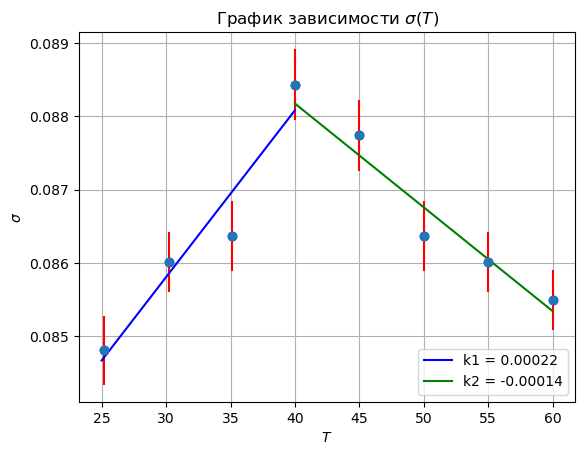

In [55]:
fig, ax = plt.subplots()
plt.errorbar(Ts, sigmas, yerr=dsigmas, fmt='o', ecolor='red')
#ax.plot(Ts, sigmas, 'bo-')
plt.scatter(Ts, sigmas, color="blue")
ax.set_title('График зависимости $\sigma (T)$')
plt.grid()



model1 = np.poly1d(np.polyfit(Ts1, sigmas1, 1))
polyline = np.linspace(25, 40)
plt.plot(polyline, model1(polyline), color = 'blue', label='k1 = 0.00022')

print(model1)

model1 = np.poly1d(np.polyfit(Ts2, sigmas2, 1))
polyline = np.linspace(40, 60)
plt.plot(polyline, model1(polyline), color = 'green', label='k2 = -0.00014')
plt.xlabel('$T$')
plt.ylabel('$\sigma$')
plt.legend(loc='lower right')
plt.savefig('plot1.png')

In [48]:
print(model1)

 
-0.0001416 x + 0.09384


In [65]:
k2 = -0.0001416
k1 = 0.0002277
q1 = np.array([-Ts[i]*k1 for i in range(4)])
q2 = np.array([-Ts[i]*k2 for i in range(4, 8)])
q = np.concatenate((q1, q2))

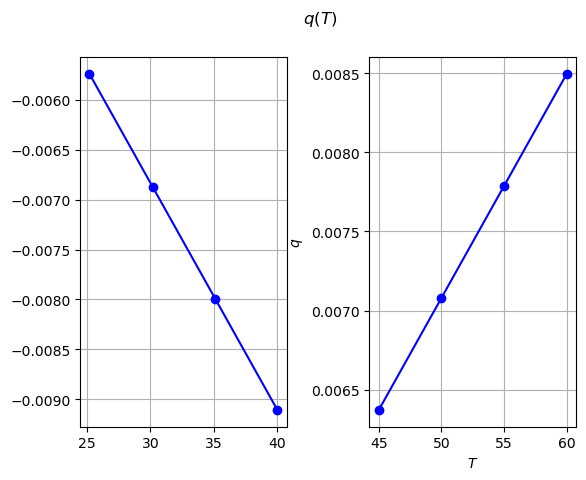

In [92]:
fig, (ax1, ax2) = plt.subplots(1, 2)
plt.subplots_adjust(wspace=0.4)
ax1.plot(Ts1, q1, 'bo-')
plt.xlabel('$T$')
ax1.grid()
ax2.plot(Ts2, q2, 'bo-')
fig.suptitle('$q(T)$')
plt.xlabel('$T$')
plt.ylabel('$q$')
ax2.grid()
fig.savefig('plot2.png')

In [80]:
u1 = np.array([(sigmas[i] + q[i]) for i in range(4)])
u2 = np.array([(sigmas[i] + q[i]) for i in range(4, 8)])
u = np.concatenate((u1, u2))

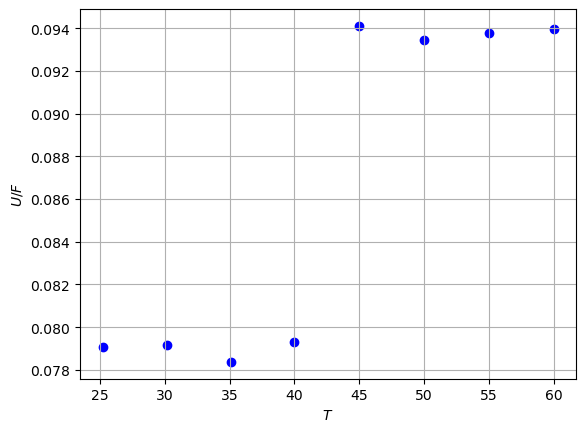

In [94]:

fig, ax = plt.subplots()
plt.scatter(Ts, u, color='blue')
plt.xlabel('$T$')
plt.ylabel('$U/F$')
ax.grid()
fig.savefig('plot3.png')